In [15]:
!pip install justext

In [0]:
import numpy as np
import nltk
import justext
import re
from nltk.tokenize import sent_tokenize
import collections

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

1.1.1

In [0]:
def top_txt(txt,top):
  most_common_words = [word for (word,f) in collections.Counter(txt).most_common(top)]
  return ''.join([word if word in most_common_words or word=='N' else '<unk>' for word in txt])
def replace_numbers(txt):
  #TODO:: Check replace numbers RegEx.
  num_format = re.compile("^[\-]?[1-9][0-9]*\.?[0-9]+$")
  return "".join([word if not re.match(num_format,word) else 'N' for word in txt])
def remove_punc(txt):
  without_punc = "".join([ c if c not in '.,:;?!@#*&%$<>' else '' for c in txt])
  return without_punc.replace("  "," ")
def tokenize(txt):
  return " ".join(nltk.word_tokenize(txt))
def segment_sents(txt):
  return "\n".join(nltk.sent_tokenize(txt))
def lower_txt(txt):
  return txt.lower()

In [0]:
def ptb_preprocess(filenames, top=10000):
  for filename in filenames:
    with open(filename) as myfile:
      

      txt_file =  myfile.read().replace('\n',' ')
      paragraphs = justext.justext(txt_file, justext.get_stoplist("English"))
      raw_text = "\n".join([p.text for p in paragraphs if not p.is_boilerplate])


      # raw_text = lower_txt(raw_text)
      # raw_text = segment_sents(raw_text)
      # print('segment_sents')
      # print(raw_text[:200])
      # raw_text = remove_punc(raw_text)
      # print('remove_punkt')
      # print(raw_text[:200])
      # raw_text = tokenize(raw_text)
      # print('tokenize')
      # print(raw_text[:200])
      # raw_text = replace_numbers(raw_text)
      # print('replace_numbers')
      # print(raw_text[:200])
      # raw_text = top_txt(raw_text,top)
      # print('top_txt')
      # print(raw_text[:200])

      raw_text = top_txt(raw_text,top)
      raw_text = replace_numbers(raw_text)
      raw_text = tokenize(raw_text)
      raw_text = segment_sents(raw_text)
      raw_text = remove_punc(raw_text)
      raw_text = lower_txt(raw_text)
      
      
      new_filename = filename+'.out'
      #print(new_filename)
      with open(new_filename, "w") as text_file:
        text_file.write(raw_text)



In [20]:
!wget https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt 

--2019-12-25 18:56:16--  https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4573338 (4.4M) [text/plain]
Saving to: ‘shakespeare_input.txt.3’

shakespeare_input.t 100%[===================>]   4.36M  3.83MB/s    in 1.1s    

2019-12-25 18:56:17 (3.83 MB/s) - ‘shakespeare_input.txt.3’ saved [4573338/4573338]



1.1.1 Discussion: According to the descripted above if we apply the conventions of Penn Treebank, we shall give independent meaning for every word after the tokenization. Also, if we use character-level language model, we shall get another definition - morphological, because now we care about structure of the word.

1.1.2 :

In [21]:
!wget http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz
!tar zxvf simple-examples.tgz

!ls simple-examples/data
!mv ./simple-examples/data ../data

--2019-12-25 18:56:19--  http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34869662 (33M) [application/x-gtar]
Saving to: ‘simple-examples.tgz.3’

simple-examples.tgz 100%[===================>]  33.25M  19.4MB/s    in 1.7s    

2019-12-25 18:56:21 (19.4 MB/s) - ‘simple-examples.tgz.3’ saved [34869662/34869662]

./
./simple-examples/
./simple-examples/data/
./simple-examples/data/ptb.test.txt
./simple-examples/data/ptb.train.txt
./simple-examples/data/ptb.valid.txt
./simple-examples/data/README
./simple-examples/data/ptb.char.train.txt
./simple-examples/data/ptb.char.test.txt
./simple-examples/data/ptb.char.valid.txt
./simple-examples/models/
./simple-examples/models/swb.ngram.model
./simple-examples/models/swb.rnn.model
./simple-examples/models/README
.

In [22]:
!ls

recipes_dataset		 shakespeare_input.txt.2  simple-examples.tgz.1
sample_data		 shakespeare_input.txt.3  simple-examples.tgz.2
shakespeare_input.txt	 simple-examples	  simple-examples.tgz.3
shakespeare_input.txt.1  simple-examples.tgz


In [23]:
len(set(remove_punc('hello, you, hello').split()))

2

In [0]:
def num_token(txt):
  txt = txt.lower()
  return len(nltk.word_tokenize(txt))
def num_char(txt):
  return len(''.join(txt.split()))
def dist_words(txt): #vocabulary size
  txt = txt.lower()
  return len(set(remove_punc(txt).split()))
def topN_words(txt,N):
  most_common_words = ' '.join([word for (word,f) in collections.Counter(txt).most_common(N)])
  return num_tokenize(most_common_words)
def token_type_ratio(txt):
  return num_token(txt)/dist_words(txt)

def types_oov(txt_dev,txt_train): #Out Of Vocabulary 
    txt_dev = txt_dev.lower()
    text_dev_set = set(remove_punc(txt_dev).split())
    txt_train = txt_train.lower()
    text_train_set = set(remove_punc(txt_train).split())
    return len(tex_dev_set.difference(text_train_set))
def avg_sd_char_token(txt):
  total_chars = sum( [len(w) for w in nltk.word_tokenize(txt)])
  avg =  total_chars/num_token(txt)

  total_avg_chars = sum( [len(w)-avg for w in nltk.word_tokenize(txt)])
  sd =  total_chars/num_token(txt)
  return avg,sd

def dist_n_gram_words(txt,n=[2,3,4]):
  txt = txt.lower()
  txt = nltk.word_tokenize(txt)
  ans = {}
  for i in n:
    ans[i] = diff_grams(txt,i)
  return ans

def dist_n_gram_chars(txt,n=range(1,8)):
  ans = {}
  for i in n:
    ans[i] = diff_grams(txt,i)
  return ans

def diff_grams(txt,n):
  s = set()
  gram = list(range(0,n))
  while gram[-1]!=len(txt):
    next_gram = tuple([txt[g] for g in gram])
    s.add(next_gram)
    gram = [g+1 for g in gram]
  return len(s)

In [25]:
# you need matplotlib version 1.4 or above
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
%matplotlib inline
def power_law_rule(corpus):
  corpus = lower_txt(corpus)
  corpus = tokenize(corpus)
  plt.loglog([val for word,val in collections.Counter(corpus).most_common(4000)])
  plt.xlabel('rank')
  plt.ylabel('frequency');

3.1.2


IsADirectoryError: ignored

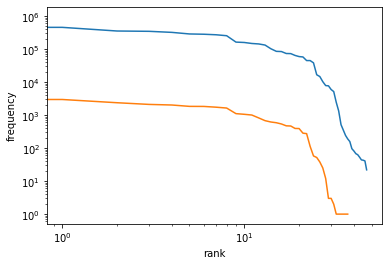

In [26]:
import os

dir = '../data'
for filename in os.listdir(dir):
  with open(dir+'/'+ filename,'r') as file:
      data = file.read()
      power_law_rule(data)

1.2 n-gram Word Language Model

In [0]:
#how to calculate the freq of h*w
#how to calculate the freq of w.

from collections import Counter,defaultdict
import math
from functools import reduce
from abc import ABC, abstractmethod

class LangModell:
  @abstractmethod
  def predict_next_word(self,prev_words):
    pass
  @abstractmethod
  def evaluate_next_word(self,prev_word):
    pass
  
class n_gram_model(LangModell):
  def __init__(self,gamma=0):
    self.outlm = {}
    self.freq_words = collections.Counter()
    self.gamma = gamma

  def train_model(self, dataset,n,pre_process,tokenize=True):
    lm = defaultdict(Counter)
    if pre_process == True :
      ptb_preprocess([dataset])
    filename =  dataset if pre_process == False else dataset+'.out'
    with open(filename) as file:
      data = file.read()
      if tokenize:
        data = nltk.word_tokenize(data)
    self.freq_words = collections.Counter(data)
    n = n-1
    if tokenize:
      pad = ["~"] * n
    else:
      pad = '~' * n
    data = pad + data
    for i in range(len(data)-n):
        history, word = tuple(data[i:i+n]), data[i+n]
        lm[history][word]+=1

    def normalize(counter):

       #(c+gamma)/(N+B*gamma) according to the lidstone estimator from the NLTK docs.
      
        N = float(sum(counter.values()))
        B = len(counter)
        return { word : c+self.gamma/(N+B*self.gamma) for word,c in counter.items()}

    self.freq_words= {word:freq/len(data) for word,freq in self.freq_words.items()}
    self.not_normalized_lm = lm
    self.outlm = {hist:normalize(cntr) for hist, cntr in lm.items()}

  def predict_next_word(self, prev_words,chars=False):
    if chars:
      possible_words = self.outln(tuple(prev_words))
    else:
      possible_words =  self.outlm[tuple(nltk.word_tokenize(prev_words.lower()))]
    next_word, prob = max(possible_words.items(), key=lambda x:x[1])
    return next_word,prob

  def evaluate_next_word(self, prev_words,next_word):
    prev_words = tuple(nltk.word_tokenize(prev_words.lower()))
    if prev_words in self.outlm:
      counter = self.not_normalized_lm[prev_words]
      N = float(sum(counter.values()))
      B = len(counter)
      c = self.not_normalized_lm[prev_words][next_word]
      return (c+self.gamma)/(N+B*self.gamma) 
    return 0

def perplexity(model,test_filename,pre_process=True,n=2):
  if pre_process == True:
    ptb_preprocess([test_filename])
    filename = test_filename+'.out'
  else:
    filename=test_filename
  with open(filename) as file:
    data = nltk.word_tokenize(file.read())
  answer = 1
  #print("Number of tested tokens :", len(data))
  for i in range(len(data) - (n+1)):
    prev_words = ' '.join(data[i:i+n-1])
    next_word = data[i+n-1]
    eval = model.evaluate_next_word(prev_words,next_word)
    #print(eval)
    if eval!=0:
      eval = (1/eval) **(1/len(data))
      answer*= eval
  return answer  

def cross_entropy(model,test_filename,pre_process=True):
  #TODO: validate how to calculate it
  if pre_process == True:
    ptb_preprocess([test_filename])
    filename = test_filename+'.out'
  else:
    filename = test_filename
  with open(filename) as file:
    data = nltk.word_tokenize(file.read())
  return sum( [math.log(model.freq_words[word],2)/len(data) for word in data] )

def train_word_gen(dataset,n=2,gamma=0):
  lm = n_gram_model(gamma=gamma)
  lm.train_model(dataset,n,False)
  return lm

def train_word_lm(dataset,n=2,tokenize=True):
  lm = n_gram_model()
  lm.train_model(dataset,n,False,tokenize=tokenize)
  return lm

In [0]:
#Example:
lm = train_word_lm('../data/ptb.train.txt')
lm.predict_next_word('Not')

*1.2.2 How much memory do you expect a model to occupy? Refer to the statistics results above and provide worst-case estimates as well as expected.*

**Answer:** For each bigram in the text, we a list of tuples - each the size of 2 (bigram) and a word after it.
We can compute with the statistics the total number of distinct bigrams and multiply it by total number of distinct words in the corpus - that will be the worst case.

In [0]:
with open('../data/ptb.train.txt','r') as file:
  data = file.read()
  print(dist_words(data))
  print(dist_n_gram_words(data,n=[2]))



In [0]:
perplexity(lm,'../data/ptb.test.txt',False)

In [0]:
cross_entropy(lm,'../data/ptb.test.txt',False)

##1.3.1

In [0]:

gamma_values = np.linspace(0.1,1,num=7)
perplexity_values = []
for gamma in gamma_values:
  lm = train_word_gen('../data/ptb.train.txt',gamma=gamma)
  perplexity_values += [perplexity(lm,'../data/ptb.valid.txt')]

plt.plot(gamma_values,perplexity_values)
#plt.loglog([val for word,val in collections.Counter(corpus).most_common(4000)])
plt.xlabel('$\gamma$')
plt.ylabel('PERPLEXITY')

In [0]:
best_gamma = 1 #according to the plot above

n_values = list(range(2,20,2))
perplexity_values = []
for n in n_values:
  lm = train_word_gen('../data/ptb.train.txt',n=n,gamma=best_gamma)
  print (perplexity(lm,'../data/ptb.valid.txt',n=n))
  perplexity_values += [perplexity(lm,'../data/ptb.valid.txt',n=n)]

plt.plot(n_values,perplexity_values)
#plt.loglog([val for word,val in collections.Counter(corpus).most_common(4000)])
plt.xlabel('n')
plt.ylabel('PERPLEXITY')

In [0]:
best_n = 3
best_gamma =1

lm = train_word_gen('../data/ptb.train.txt',n=best_n,gamma=best_gamma)
print(perplexity(lm,'../data/ptb.test.txt',n=best_n))



#TODO: for Nitzan
1. Check what happens when for P(a|b) b=0 and specifically for our ngrams model
2. Check with others about the perplexity when n>2
3. compare perplexity graph accoridng to gamma

1.3.2 Generating text

Another way to evaluate a language model is to use the model in a generative manner - that is, to randomly sample sentences starting from a seed prefix, and generating each next word by sampling from the model distribution p(w | prefix).

Discuss ways to generate when the seed is shorter than the history length of the n-gram model. Discuss ways to decide when the generation should stop. In this question, when you sample from the LM given a history, pick the most likely word generated by the LM. Report at least 5 randomly generated segments on different seeds and comment on what you observe.

In [0]:
def generate(model,seed):
  p = 0
  output = seed
  while True:
    next_word, prob = model.predict_next_word(seed)
    output = ' '+ next_word
    p+= prob
    if p>=1:
      break
  return output

##1.4

In [0]:
#download the dataset
!wget http://www.ffts.com/recipes/lg/lg32965.zip
!unzip lg32965 -d recipes_dataset
!rm lg32965.zip
!ls

In [0]:
#prepare dataset
with open('recipes_dataset/32965.mmf',errors='ignore') as file:
  recipes=[]
  collector = []
  for line in file:
    line = str(line).replace('MMMMM','')#.replace('\n','')
    if 'Recipe via Meal-Master (tm) v8.05' in line:
      recipes += [''.join(collector)]
      collector = []
    else:
      collector += [line]
  recipes += [''.join(collector)]
  recipes = recipes[1:]

#print statistics
total_recipes = ''.join(recipes)
print('number of recipes',len(recipes))
print('number of tokens',num_token(total_recipes))
print('number of characters',num_char(total_recipes))
print('vocabulary size',dist_words(total_recipes))
print('avg word count',float(np.mean([num_token(rec) for rec in recipes])))
print('avg word length')


In [0]:
class MyDataLoader():

  def __init__(self,dataset):
    from math import floor,ceil

    self.train_data = dataset[0:floor(0.8*len(dataset))]
    self.valid_data = dataset[ceil(0.8*len(dataset)):floor(-0.1*len(dataset))]
    self.test_data = dataset[ceil(-0.1*len(dataset)):]

In [0]:
dataloader = MyDataLoader(recipes)
joined_recipes_train = ''.join(dataloader.train_data)
joined_recipes_test = ''.join(dataloader.test_data)
joined_recipes_val = ''.join(dataloader.valid_data)

# with open('tmp_train.txt', "w") as text_file:
#   text_file.write(joined_recipes_train)
# with open('tmp_test.txt', "w") as text_file:
#   text_file.write(joined_recipes_test)

#using Ben Eyal's implementation for chars lang. model


def create_lm(data, n=5):
    pad = '$' * (n-1)
    data = pad + data
    cfd = nltk.ConditionalFreqDist((data[i : i + n-1], data[i + n-1]) for i in range(len(data) - (n-1)))
    cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)
    return cpd

def chars_generate(lm,n,num_chars):
  import string
  import random

  out = []
  hist = '$' * (n-1)
  for _ in range(num_chars):
      try:
        #print(hist)
        #print(lm[hist])
        letter = lm[hist].generate()
      except:
        break
      hist = hist[1:] + letter
      out.append(letter)
  print(''.join(out))

def chars_perplexity(lm,data,n):
  answer = 1
  for i in range(len(data) - (n+1)):
      prev_chars = data[i:i+n-1]
      next_char= data[i+n-1]
      eval = lm[prev_chars].prob(next_char)
      if eval==0:
        eval = 1/(128) #ascii (smoothing)
      if eval!=0:
        eval = (1/(eval)) **(1/len(data))
        answer*= eval
  return answer  




In [0]:
n_values = list(range(2,20,2))
perplexity_values = []
for n in n_values:
  lm = create_lm(joined_recipes_train,n=n)
  perplexity_values += [chars_perplexity(lm,joined_recipes_val,n=n)]

plt.plot(n_values,perplexity_values)
plt.xlabel('n')
plt.ylabel('PERPLEXITY')

In [0]:
best_n = 6 #according to the graph

lm = create_lm(joined_recipes_train, n=best_n)
num_chars = int(np.mean([num_char(rec) for rec in dataloader.test_data]))
chars_generate(lm,best_n,num_chars)

In [0]:
chars_generate(lm,best_n,num_chars)

In [0]:
chars_generate(lm,best_n,num_chars)

In [0]:
chars_generate(lm,best_n,num_chars)

###Observations
We can see that the LM's dist. can 'understand' the structure of recipes. That is, understand a syntax similar to [amount] [unit] [ingredient] [activity]* 

We also observe that some ingredient typically occure in the beginning, such as Oregano, we have no idea why it happens.

The model doesn't do indendation like the dataset. It doesn't finish some sentences.

Although the model is for characters, we can see that it's not completely gibberish, there are many real English words that appear semantically in the vocabullary of recipes, as we expected.


#Part 2

In [0]:
import matplotlib.pyplot as plt
import matplotlib
import math
import numpy as np
import scipy.linalg

In [0]:
def generateDataset(N, f, sigma):
  mu = 0.0
  vf = np.vectorize(f)
  x = np.linspace(0,1,num=N)
  noise = np.random.normal(loc=mu,scale=sigma,size=N)
  t = vf(x) + noise
  return (x,t)

In [0]:
#sanity check
f = lambda x : math.sin(math.pi * 2 * x)
plt.plot(*generateDataset(10,f,0.1))

In [0]:
def OptimizeLS(x, t, M):                      
  phi = np.vander(x,M+1,True)
  prod = np.dot(phi.T, phi)             
  i = np.linalg.inv(prod)
  m = np.dot(i, phi.T)
  w = np.dot(m, t)
  return w                                                              

In [0]:
np.vander([1,2,3,4],3,True)

In [0]:
(x,t) = generateDataset(10,f,0.1)
plt.plot(x,t)

In [0]:
N = 10
get_y = lambda w,M: lambda x: sum([w[i]*(x**i) for i in range(M+1)])
(x,t) = generateDataset(N,f,0.03)
plt.plot(x,t)
for M in [1,3,5,10]:
  w = OptimizeLS(x,t,M)
  y_hat = np.vectorize(get_y(w,M))
  plt.plot(x,y_hat(x))
plt.legend(['sin(2*pi*x)+noise','y_hat_1','y_hat_3','y_hat_5','y_hat_10'])

##2.4

In [0]:
def generateDataset3(N,f,sigma):
  from math import ceil,floor
  mu = 0.0
  vf = np.vectorize(f)
  x = np.linspace(0,1,num=N*3)

  noise = np.random.normal(loc=mu,scale=sigma,size=N*3)
  t = vf(x) + noise
  pairs = list(zip(x,t))
  #print(list(zip(x,t)))
  np.random.shuffle(pairs)
  #print(pairs)
  def sort_by_x(lst):
    return sorted(lst,key=lambda x : x[0])
  train = sort_by_x(pairs[0:N])
  valid = sort_by_x(pairs[N:2*N])
  test = sort_by_x(pairs[2*N:])
  return train,valid,test

In [0]:
a,b,c = generateDataset3(10,f,0.1)
a_x = [x for x,_ in a]
a_y = [y for _,y in a]
plt.plot(a_x,a_y)

In [0]:
def optimizePLS(x, t, M, _lambda):
  phi = np.vander(x,M+1,True)
  prod = np.dot(phi.T, phi)
  lambda_mat = np.eye(M+1)*_lambda + prod
  i = np.linalg.inv(lambda_mat)
  m = np.dot(i, phi.T)
  w = np.dot(m, t)
  return w   

In [0]:
def optimizePLS2(xt, tt, xv, tv, M):
  N = len(xt)
  min_error  = [1,1,float("inf")]
  for log_lambda in range(-40,-20):
    w = optimizePLS(xt,tt,M,2**log_lambda)
    error = calculate_error(w,xv,tv)
    if error<min_error[2]:
      min_error = [2**log_lambda,w,error]
  print('chosen lambda',min_error[0])
  return min_error[0],w

In [0]:
def calculate_error(w,x,y):
  poly = np.vectorize(get_y(w,M))
  poly = poly(x)
  power2 = lambda x : x**2
  error = (1/N)*(sum(power2(y - poly)))**(1/2)
  return error

In [0]:
for N in [10,100]:
  (train,val,test) = generateDataset3(N,f,0.03)
  xt = [x for x,_ in train]
  tt = [x for _,x in train]
  xv = [x for x,_ in val]
  tv = [x for _,x in val]
  xtest = [x for x,_ in test]
  ttest = [x for _,x in test]
  M = N - 1
  _,w = optimizePLS2(xt,tt,xv,tv,M)
  plt.scatter(N,calculate_error(w,xt,tt))
  plt.scatter(N,calculate_error(w,xv,tv))
  plt.scatter(N,calculate_error(w,xtest,ttest))
plt.legend(['train','valid','test','train','valid','test'])

##2.4

In [0]:
import numpy as np


def bayesianEst(x,t,M,alpha,sigma2):
  phi = lambda x : np.array([x**i for i in range(M+1)]).T
  N = len(x)
  collect_vectors = [phi(xi) for xi in x]
  phi_mat = np.matrix(collect_vectors)
  S_inv = alpha*np.eye(M+1) + phi_mat*phi_mat.T
  S = np.linalg.inv(S_inv)
  def mean(xi):
    sumX = np.array(np.zeros((M+1, 1)))
    for n in range(N):
      sumX += phi_mat[n].T* t[n]
    return (1/sigma2)*phi(xi).T*S*sumX
  
  def variance(x):
    return sigma2**2 + (phi(x).T)@S@phi(x)
    
  return (mean,variance)

In [75]:
m,v = bayesianEst([1,2,3],[1,2,3],2,0,0.1)
print(m(1))
print(v(1))

[[120.]]
[[1.01]]


m,v = bayesianEst([1,2,3],[1,2,3],2,0,0.1)

1.   List item
2.   List item


v(1)

In [0]:
def bayesianEstimator(x, t, M, alpha, sigma2):
  t_vec = np.asarray(t).T
  N = len(x)
  print(t_vec.shape)
  phi = np.vander(x,M+1,True)
  #print(phi)
  phi_ = lambda x : np.array([x**i for i in range(M+1)]).T
  S_inv = alpha*np.eye(M+1) + (1/sigma2)*np.dot(phi.T,phi)
  S = np.linalg.inv(S_inv)
  def m(x):
    a = (1/sigma2)*phi_(x).T
    print(a)
    print(phi[:,0:N].shape)
    b = phi[:,0:N]@t_vec
    return a@S@b

  #m = lambda x : (1/sigma2)*(phi_(x).T@S@ phi[1:N,:]@t_vec)
  s2 = lambda x : sigma2 + phi_(x).T@S@phi_(x)
  return (m,s2)
  

In [98]:
h = list(range(100))
m,var = bayesianEstimator(h,h,2,0.1,0.1)

(100,)


In [99]:
m(1)

[10. 10. 10.]
(100, 3)


ValueError: ignored

In [81]:
var(1)

0.18913876122536905